In [9]:
import sys; sys.path.append("../src1")
from direct import Direct
import numpy as np, pygmo as pg, matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
# boundary conditions
x0 = [0, 0, np.pi, 0]
xf = [1, 0, 0, 0]

In [3]:
# duration bounds
Tlb, Tub = 0, 100

In [4]:
# direct segment
seg = Direct(x0, xf, Tlb, Tub)

In [5]:
# solve problem with linear guess
dv = seg.solve(seg.linear_guess(20))

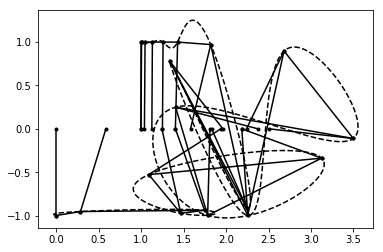

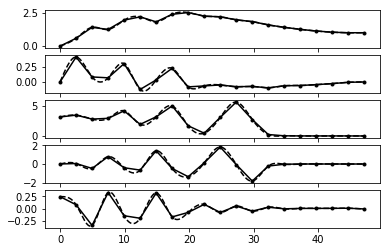

In [6]:
# plot
times, h, states, controls = seg.decode(dv)
ax = seg.plot_traj(states, interp=True)
ax = seg.plot_timeline(times, states, controls, interp=True)

In [ ]:
dv = seg.solve(seg.interpolate(dv, 100))

In [10]:
# plot
times, h, states, controls = seg.decode(dv)
ax = seg.plot_traj(states, interp=True)
ax = seg.plot_timeline(times, states, controls, interp=True)

In [ ]:
seg.decode(dv)